# Third Assignment
* Each part of this assignment is distinquished from the other using a h2 header.
> Themelina Kouzoumpasi  
>  p3170076

- Libraries used in this assignment are imported below. The libraries regarding the classification of the speeches will be imported when they're needed.

In [1]:
# libraries' imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

# If max_cols is exceeded, switch to truncate view
pd.set_option('display.max_columns', None)

# to open a graph on same slide
%matplotlib inline

## Data Selection and Preparation
* DataFrame `speeches` contains Greek Parliament proceeding. The data was downloaded from [here](https://zenodo.org/record/2587904/files/Greek_Parliament_Proceedings_1989_2019.csv.zip?download=1)

In [2]:
speeches = pd.read_csv("Greek_Parliament_Proceedings_1989_2019.csv.zip",
                       compression = "zip",
                       index_col = False,
                       parse_dates = ["sitting_date"])
speeches

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ..."
3,NaN,1989-07-03,period 5,session 1,sitting 1,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
4,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...
...,...,...,...,...,...,...,...,...
1194402,συντυχακης δανιηλ εμμανουηλ,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,κομμουνιστικο κομμα ελλαδας,NaN,"Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ..."
1194403,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,"Ορίστε, κύριε Υπουργέ, έχετε τον λόγο."
1194404,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,"Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ..."
1194405,NaN,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."


* Columns `parliamentary_period`, `parliamentary_session` and `parliamentary_sitting` are not needed so they are removed.

In [3]:
speeches = speeches.drop(["parliamentary_period", "parliamentary_session","parliamentary_sitting"], axis=1)
speeches

,member_name,sitting_date,political_party,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ..."
3,NaN,1989-07-03,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
4,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...
...,...,...,...,...,...
1194402,συντυχακης δανιηλ εμμανουηλ,2019-02-22,κομμουνιστικο κομμα ελλαδας,NaN,"Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ..."
1194403,κακλαμανης μιχαηλ νικητας,2019-02-22,νεα δημοκρατια,προεδρευων,"Ορίστε, κύριε Υπουργέ, έχετε τον λόγο."
1194404,κακλαμανης μιχαηλ νικητας,2019-02-22,νεα δημοκρατια,προεδρευων,"Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ..."
1194405,NaN,2019-02-22,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."


* As shown above, some values in `member_name` and in `speaker_info` are NaN. Constraining these entries, it is proved that the majority of the entries in column `speech` aren't valuable for the research.

In [4]:
speeches[speeches["member_name"].isnull()]

,member_name,sitting_date,political_party,speaker_info,speech
3,NaN,1989-07-03,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
10,NaN,1989-07-04,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
18,NaN,1989-07-05,πανελληνιο σοσιαλιστικο κινημα,βουλευτης/ες,Να μας τη διαβάσετε.
59,NaN,1989-07-05,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
61,NaN,1989-07-05,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
...,...,...,...,...,...
1194086,NaN,2019-02-21,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
1194096,NaN,2019-02-21,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
1194338,NaN,2019-02-21,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
1194340,NaN,2019-02-21,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."


 - Since the dataset is excessive, these values will be deleted. 

In [5]:
speeches = speeches.drop(speeches[speeches["member_name"].isnull()].index)
speeches

,member_name,sitting_date,political_party,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ..."
4,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...
5,κρητικος νικολαου παναγιωτης,1989-07-04,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Υπάρχει κανείς εκ των κυρίων συναδέλφων, ο οπ..."
...,...,...,...,...,...
1194401,κακλαμανης μιχαηλ νικητας,2019-02-22,νεα δημοκρατια,προεδρευων,Τα υπόλοιπα στη δευτερολογία σας.Κύριε Συντυχ...
1194402,συντυχακης δανιηλ εμμανουηλ,2019-02-22,κομμουνιστικο κομμα ελλαδας,NaN,"Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ..."
1194403,κακλαμανης μιχαηλ νικητας,2019-02-22,νεα δημοκρατια,προεδρευων,"Ορίστε, κύριε Υπουργέ, έχετε τον λόγο."
1194404,κακλαμανης μιχαηλ νικητας,2019-02-22,νεα δημοκρατια,προεδρευων,"Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ..."


- In addition, since this assignment focuses on the speeches and the political parties they match to, all NaN values in `political_party` and `speech` columns are dropped as the values of these columns are needed.

In [6]:
speeches = speeches.drop(speeches[speeches["political_party"].isnull()].index)

speeches = speeches.drop(speeches[speeches["speech"].isnull()].index)

speeches

,member_name,sitting_date,political_party,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ..."
4,κρητικος νικολαου παναγιωτης,1989-07-03,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...
5,κρητικος νικολαου παναγιωτης,1989-07-04,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Υπάρχει κανείς εκ των κυρίων συναδέλφων, ο οπ..."
...,...,...,...,...,...
1194401,κακλαμανης μιχαηλ νικητας,2019-02-22,νεα δημοκρατια,προεδρευων,Τα υπόλοιπα στη δευτερολογία σας.Κύριε Συντυχ...
1194402,συντυχακης δανιηλ εμμανουηλ,2019-02-22,κομμουνιστικο κομμα ελλαδας,NaN,"Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ..."
1194403,κακλαμανης μιχαηλ νικητας,2019-02-22,νεα δημοκρατια,προεδρευων,"Ορίστε, κύριε Υπουργέ, έχετε τον λόγο."
1194404,κακλαμανης μιχαηλ νικητας,2019-02-22,νεα δημοκρατια,προεδρευων,"Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ..."


- The chairman of the Parliament has the value of '*προεδρος*' or '*προεδρευων*' in `speaker_info` column. The role of a chairman is to organize the meeting of the Parliament. Even though he/she belongs to a political party, when having this role he/she doesn't make a stand on the matters discussed in the meeting. This means that he/she doesn't represent the political party he/she belongs to when having this role, so his/her speeches also don't represent the political party.
- So, having the assignment focusing on identifying the political party that is matched to a speech, speeches made from chairmen ('*προεδρος*' and '*προεδρευων*') aren't useful, and are dropped.

In [7]:
speeches = speeches.drop(speeches[speeches['speaker_info'].isin(['προεδρος','προεδρευων'])].index)
speeches

,member_name,sitting_date,political_party,speaker_info,speech
12,τσοβολας κωνσταντινου δημητριος,1989-07-05,πανελληνιο σοσιαλιστικο κινημα,NaN,"Κύριε Πρόεδρε, δεν έχουν μοιραστεί όλα τα ψηφ..."
16,τζαννετακης πετρου τζαννης,1989-07-05,νεα δημοκρατια,προεδρος της κυβερνησης και υπουργος των εξωτε...,"~""ΕΦΗΜΕΡΙΣ ΤΗΣ ΚΥΒΕΡΝΗΣΕΩΣ ΤΗΣ ΕΛΛΗΝΙΚΗΣ ΔΗΜΟ..."
21,αλευρας νικολαου ιωαννης,1989-07-05,πανελληνιο σοσιαλιστικο κινημα,NaN,"Κύριε Πρόεδρε, κατ' αρχή θα πω μερικές κουβέν..."
23,αλευρας νικολαου ιωαννης,1989-07-05,πανελληνιο σοσιαλιστικο κινημα,NaN,Λέει ο Κανονισμός ότι σε εξαιρετικές περιπτώσ...
25,αλευρας νικολαου ιωαννης,1989-07-05,πανελληνιο σοσιαλιστικο κινημα,NaN,"Όσον αφορά το πρώτο θέμα, κατ` αρχήν θέλω να π..."
...,...,...,...,...,...
1194392,κατσανιωτης ιωαννη ανδρεας,2019-02-22,νεα δημοκρατια,NaN,"Μα, τι λέτε τώρα;"
1194393,γαβρογλου βασιλειου κωνσταντινος,2019-02-22,συνασπισμος ριζοσπαστικης αριστερας,"υπουργος παιδειας, ερευνας και θρησκευματων",Καταλαβαίνετε τι λέτε τώρα; Αυτό είναι το πρώ...
1194395,συντυχακης δανιηλ εμμανουηλ,2019-02-22,κομμουνιστικο κομμα ελλαδας,NaN,"Ευχαριστώ, κύριε Πρόεδρε.Κύριε Υπουργέ, έγινα..."
1194397,συντυχακης δανιηλ εμμανουηλ,2019-02-22,κομμουνιστικο κομμα ελλαδας,NaN,"Ολοκλήρωσα, κύριε Πρόεδρε. Αντιλαμβάνεστε ότι..."


- For the classification of the speeches, only columns `political_party` and `speech` are needed.
- DataFrame `classify` contains all entries of `speeches` DataFrame, removing the unnecessary columns.

In [8]:
classify = speeches[['speech','political_party']].reset_index().drop('index',axis=1)
classify

,speech,political_party
0,"Κύριε Πρόεδρε, δεν έχουν μοιραστεί όλα τα ψηφ...",πανελληνιο σοσιαλιστικο κινημα
1,"~""ΕΦΗΜΕΡΙΣ ΤΗΣ ΚΥΒΕΡΝΗΣΕΩΣ ΤΗΣ ΕΛΛΗΝΙΚΗΣ ΔΗΜΟ...",νεα δημοκρατια
2,"Κύριε Πρόεδρε, κατ' αρχή θα πω μερικές κουβέν...",πανελληνιο σοσιαλιστικο κινημα
3,Λέει ο Κανονισμός ότι σε εξαιρετικές περιπτώσ...,πανελληνιο σοσιαλιστικο κινημα
4,"Όσον αφορά το πρώτο θέμα, κατ` αρχήν θέλω να π...",πανελληνιο σοσιαλιστικο κινημα
...,...,...
734477,"Μα, τι λέτε τώρα;",νεα δημοκρατια
734478,Καταλαβαίνετε τι λέτε τώρα; Αυτό είναι το πρώ...,συνασπισμος ριζοσπαστικης αριστερας
734479,"Ευχαριστώ, κύριε Πρόεδρε.Κύριε Υπουργέ, έγινα...",κομμουνιστικο κομμα ελλαδας
734480,"Ολοκλήρωσα, κύριε Πρόεδρε. Αντιλαμβάνεστε ότι...",κομμουνιστικο κομμα ελλαδας


- Finally, all duplicate rows are removed using method [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html?highlight=drop_duplicates#pandas.DataFrame.drop_duplicates)

In [9]:
classify = classify.drop_duplicates().reset_index()
classify.shape

(605909, 3)

- Punctuations and stopwords should be removed from each speech.
- For this operation, function `tokenizer` is created. It processes the speech it gets as input, performing lowercasing and removing stop words and punctuations. Tokenizer used in this function is from library `NLTK`.
- List `stopwords` contains all stop words, data that was taken from library `spaCy`.

In [10]:
from nltk.tokenize import RegexpTokenizer
from spacy.lang.el.stop_words import STOP_WORDS

stopwords = STOP_WORDS

# tokenizer to split strings according to regex
tokenizer = RegexpTokenizer(r'\w+')

# function to tokenize and lowercase 
def fix_speech(speech):
    speech = speech.lower()
    speech = ' '.join(token for token in speech.split() if token not in stopwords)
    speech = ' '.join(tokenizer.tokenize(speech))
    return speech

# apply function to all speeches
classify['speech'] = classify['speech'].apply(fix_speech)

- Variable `X` stores the inputs of the classifiers, while variable `Y` stores the outputs. In other words, speeches are stored in X while political parties are stored in Y.

In [11]:
X = classify['speech'] 
Y = classify['political_party']
display(X.head(2))
Y.head(2)

0             κύριε πρόεδρε μοιραστεί ψηφοδέλτια λευκά
1    εφημερις κυβερνησεως ελληνικης δημοκρατιας αθη...
Name: speech, dtype: object

0    πανελληνιο σοσιαλιστικο κινημα
1                    νεα δημοκρατια
Name: political_party, dtype: object

## Data Exploration
- In this part of the assignment, the goal is to explore the dataset so as to understand what it is about.

- Regarding the **speeches per party**, the following **table** shows the results. The order of the political parties is descending based on the number of speeches.

In [253]:
speeches_party = speeches[['political_party','speech']].groupby("political_party").count().sort_values(by="speech", ascending=False)

#rename column
speeches_party.rename(columns={'speech':'Number of speeches'}, inplace=True)

speeches_party

,Number of speeches
political_party,
νεα δημοκρατια,232483
πανελληνιο σοσιαλιστικο κινημα,226657
συνασπισμος ριζοσπαστικης αριστερας,81278
κομμουνιστικο κομμα ελλαδας,61753
συνασπισμος της αριστερας των κινηματων και της οικολογιας,24428
ανεξαρτητοι (εκτος κομματος),24259
λαικος ορθοδοξος συναγερμος,16821
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα),15402
λαικος συνδεσος - χρυση αυγη,14172


- Each political party has to have a unique color for all graphs, to make the analysis much easier. All political parties ares shown below.

In [254]:
speeches['political_party'].unique()

array(['πανελληνιο σοσιαλιστικο κινημα', 'νεα δημοκρατια',
       'κομμουνιστικο κομμα ελλαδας εσωτερικου',
       'κομμουνιστικο κομμα ελλαδας',
       'συνασπισμος της αριστερας των κινηματων και της οικολογιας',
       'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
       'ανεξαρτητοι (εκτος κομματος)', 'δημοκρατικη ανανεωση',
       'πολιτικη ανοιξη', 'δημοκρατικο κοινωνικο κινημα',
       'συνασπισμος ριζοσπαστικης αριστερας',
       'λαικος ορθοδοξος συναγερμος', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες - πανος καμμενος',
       'ανεξαρτητοι δημοκρατικοι βουλευτες',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'λαικη ενοτητα',
       'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)',
       'ενωση κεντρωων'], dtype=object)

- Each political party is matched with a unique [color](https://matplotlib.org/3.1.1/gallery/color/named_colors.html). Dictionary `colors` will then be used as value of the parameter `color` (or `colors` if it's a pie chart) of the graphs.

In [255]:
colors = {'κομμουνιστικο κομμα ελλαδας' : 'darkorange',
          'κομμουνιστικο κομμα ελλαδας εσωτερικου' : 'lightcoral',
          'νεα δημοκρατια' : 'red',
          'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)' : 'grey',
          'πανελληνιο σοσιαλιστικο κινημα' : 'maroon',
          'συνασπισμος της αριστερας των κινηματων και της οικολογιας':'gold',
          'δημοκρατικη ανανεωση':'black',
          'ανεξαρτητοι (εκτος κομματος)':'lime',
          'πολιτικη ανοιξη':'darkgreen',
          'δημοκρατικο κοινωνικο κινημα':'cornflowerblue',
          'συνασπισμος ριζοσπαστικης αριστερας':'blue',
          'λαικος ορθοδοξος συναγερμος':'darkmagenta',
          'ανεξαρτητοι ελληνες - πανος καμμενος':'mediumturquoise',
          'δημοκρατικη αριστερα':'olive',
          'λαικος συνδεσος - χρυση αυγη':'fuchsia',
          'ανεξαρτητοι δημοκρατικοι βουλευτες':'crimson',
          'το ποταμι':'yellow',
          'λαικη ενοτητα':'cyan',
          'ενωση κεντρωων':'violet',
          'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)':'tab:blue',
          'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια':'tab:brown'}

- The following **graph** shows the **speeches per party**. 
- As the chart shows, over 60% of the speeches were conducted by only 2 of the 21 political parties throughout the years. Because of this percent, it is expected that the classification of the speeches of these two political parties will have better accuracy than the others.

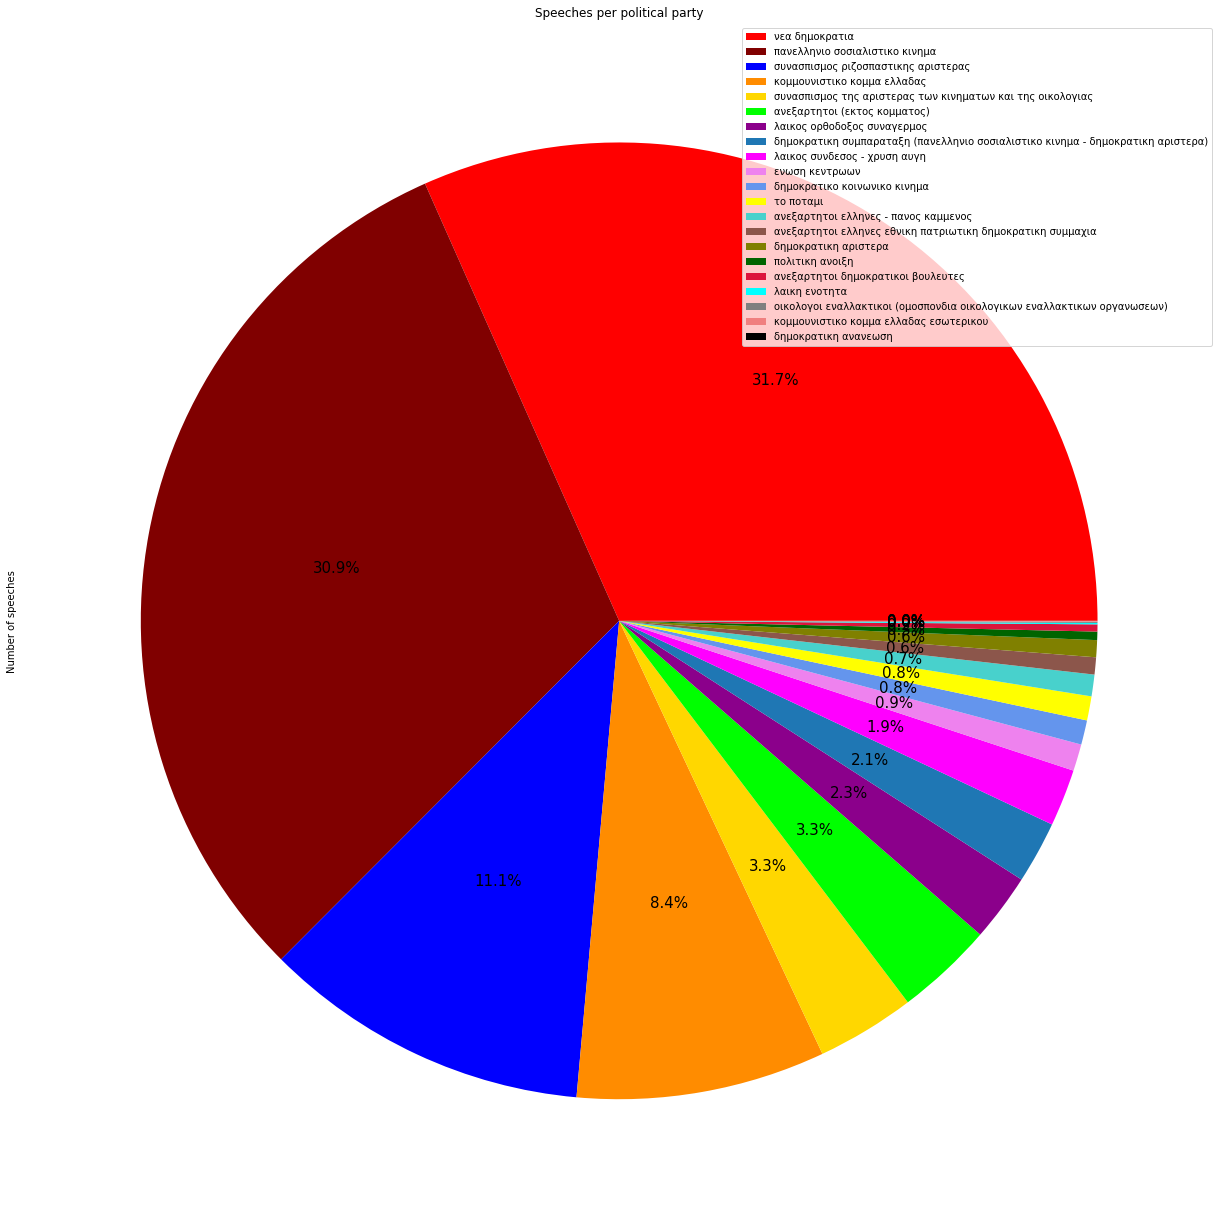

In [256]:
graph = speeches_party.plot(y = 'Number of speeches',
                            title="Speeches per political party",
                            kind='pie', 
                            labels= None,
                            autopct='%1.1f%%',
                            fontsize=15,
                            figsize=(25, 22),
                            colors=[colors[key] for key in list(speeches_party.index)])

- Regarding the **speeches over time**, the following table shows the results. The analysis is more efficient if it is done by year, as the dataset contains three decades.

In [257]:
# make a copy
speeches_time = speeches

# keep only years from dates
speeches_time.loc[:,'sitting_date'] = pd.DatetimeIndex(speeches_time['sitting_date']).strftime('%Y')

# convert years to integers
speeches_time = speeches_time.astype({'sitting_date':np.int16})

# get speeches over time
speeches_time = speeches_time[['sitting_date','speech']].groupby("sitting_date").count().sort_values(by="sitting_date").reset_index()

#rename column
speeches_time.rename(columns={'speech':'Number_of_speeches'}, inplace=True)

speeches_time

,sitting_date,Number_of_speeches
0,1989,6899
1,1990,23875
2,1991,31078
3,1992,35977
4,1993,29463
5,1994,19588
6,1996,6321
7,1997,32059
8,1998,15728
9,1999,25065


- These results are also shown in the **diagrams** below. 

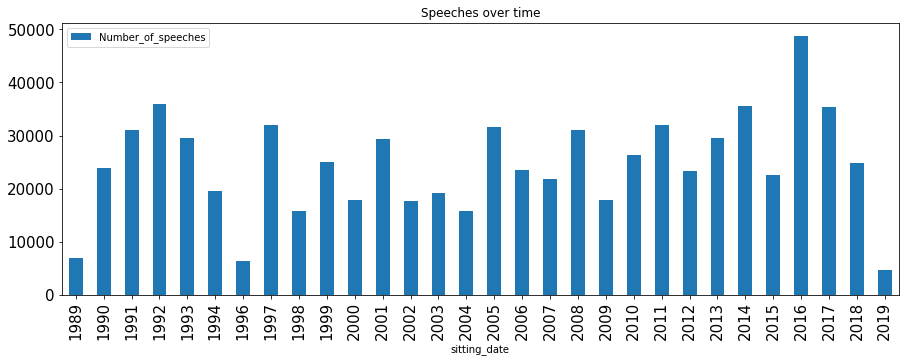

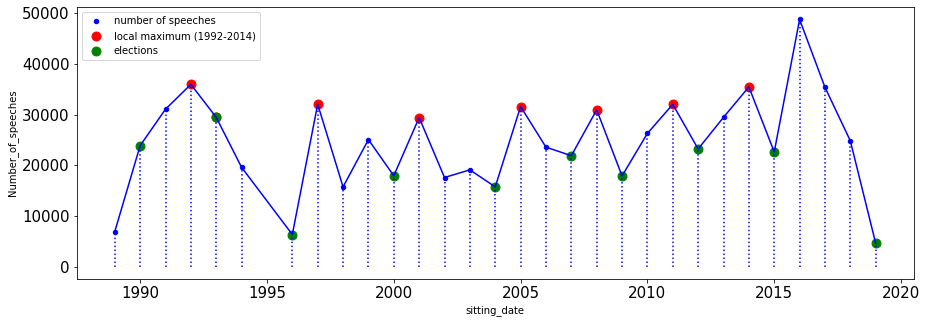

In [258]:
# first graph
graph = speeches_time.plot(x = 'sitting_date',
                           y = 'Number_of_speeches',
                           title="Speeches over time",
                           kind='bar', 
                           figsize=(15, 5),
                           fontsize=15)

# second graph
# blue dots (speeches per year)
graph_line = speeches_time.plot(x = 'sitting_date',
                                y = 'Number_of_speeches',
                                kind='scatter', 
                                color = 'blue',
                                marker ='o',
                                figsize=(15, 5),
                                label = 'number of speeches',
                                fontsize=15)
# vertical dotted lines
plt.vlines(x = speeches_time['sitting_date'], 
           ymin=0, ymax=speeches_time['Number_of_speeches'],
           linestyles='dotted',
           color='blue')

# the years the elections were conducted
elections = [1990,1993,1996,2000,2004,2007,2009,2012,2015,2019]

# red dots (local maximums)
graph_red = speeches_time[(speeches_time['sitting_date']>1991) & 
                          (speeches_time['sitting_date']<2015) & 
                          (speeches_time['sitting_date']!=2013) &
                          (speeches_time['Number_of_speeches']>=29419)]  \
                          .plot(x = 'sitting_date',
                                y = 'Number_of_speeches',
                                kind='scatter', 
                                color = 'red',
                                ax = graph_line,
                                s = 80,
                                label = 'local maximum (1992-2014)')
# green dots (elections)
graph_green = speeches_time[speeches_time['sitting_date'].isin(elections)]  \
                           .plot(x = 'sitting_date',
                                 y = 'Number_of_speeches',
                                 kind='scatter', 
                                 color = 'green',
                                 ax = graph_line,
                                 s = 80,
                                 label = 'elections')
# blue lines connecting the dots
graph_lines = plt.plot(speeches_time['sitting_date'],
                       speeches_time['Number_of_speeches'], 
                       color='blue')

- Looking at years 1992 to 2014 in the second graph, it seems as every 3-4 years there's an increase in the number of speeches, while in the years in-between there's at least one decrease (multiple forms of 'U'). The red dots represent the local maximums within a range of 6-8 years.
- Given that the Greek legislative elections (represented with green dots) were conducted in 1996, 2000, 2004, 2007, 2012, 2015, it is observed that one year after each election there's a local maximum, meaning that the majority of the members of the Parliament were more willing to make a speech. The only exceptions in this observation are years 1992, 2011 and 2014, where local maximums are observed the year before the election.

- As regards the **speeches per party and time**, the following table shows the results. The analysis is more efficient if it is done by year regarding time, as the dataset contains three decades.

In [259]:
# make a copy
speeches_partime = speeches

# keep only years from dates
speeches_partime.loc[:,'sitting_date'] = pd.DatetimeIndex(speeches_partime['sitting_date']).strftime('%Y')

# convert years to integers
speeches_partime = speeches_partime.astype({'sitting_date':np.int16})

# get speeches over time
speeches_partime = speeches_partime[['sitting_date','political_party','speech']].groupby(['sitting_date','political_party']).count().sort_values(by="sitting_date").reset_index()

#rename column
speeches_partime.rename(columns={'speech':'Number_of_speeches'}, inplace=True)

speeches_partime

,sitting_date,political_party,Number_of_speeches
0,1989,κομμουνιστικο κομμα ελλαδας,93
1,1989,κομμουνιστικο κομμα ελλαδας εσωτερικου,202
2,1989,νεα δημοκρατια,2533
3,1989,οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων...,5
4,1989,πανελληνιο σοσιαλιστικο κινημα,3304
...,...,...,...
197,2019,δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστι...,421
198,2019,ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατ...,188
199,2019,ανεξαρτητοι (εκτος κομματος),102
200,2019,ενωση κεντρωων,157


- Since the number of rows is extremely high to make a representation that can be analyzed, multiple graphs will be created.
- Each graph will show the number of speeches per political party for a particular year. Having 3 decades of data, there will be 30 graphs.

- Years 1989 to 2019 are 31 years, so the figure which will contain the subplots(graphs) will be 16x2, meaning that all years will be displayed in pairs of 2. 
- For each year, starting from 1989, its entries are isolated in dataframe `sp_year`, and after removing the vertical label `Number_of_speeches` of x-axis, a graph is created. 
- Since 16x2=32, an extra subplot will be created, and it will the last one. Having the position of this subplot, it is set to invisible.
- The **speeches per party per year** graphs are shown below.

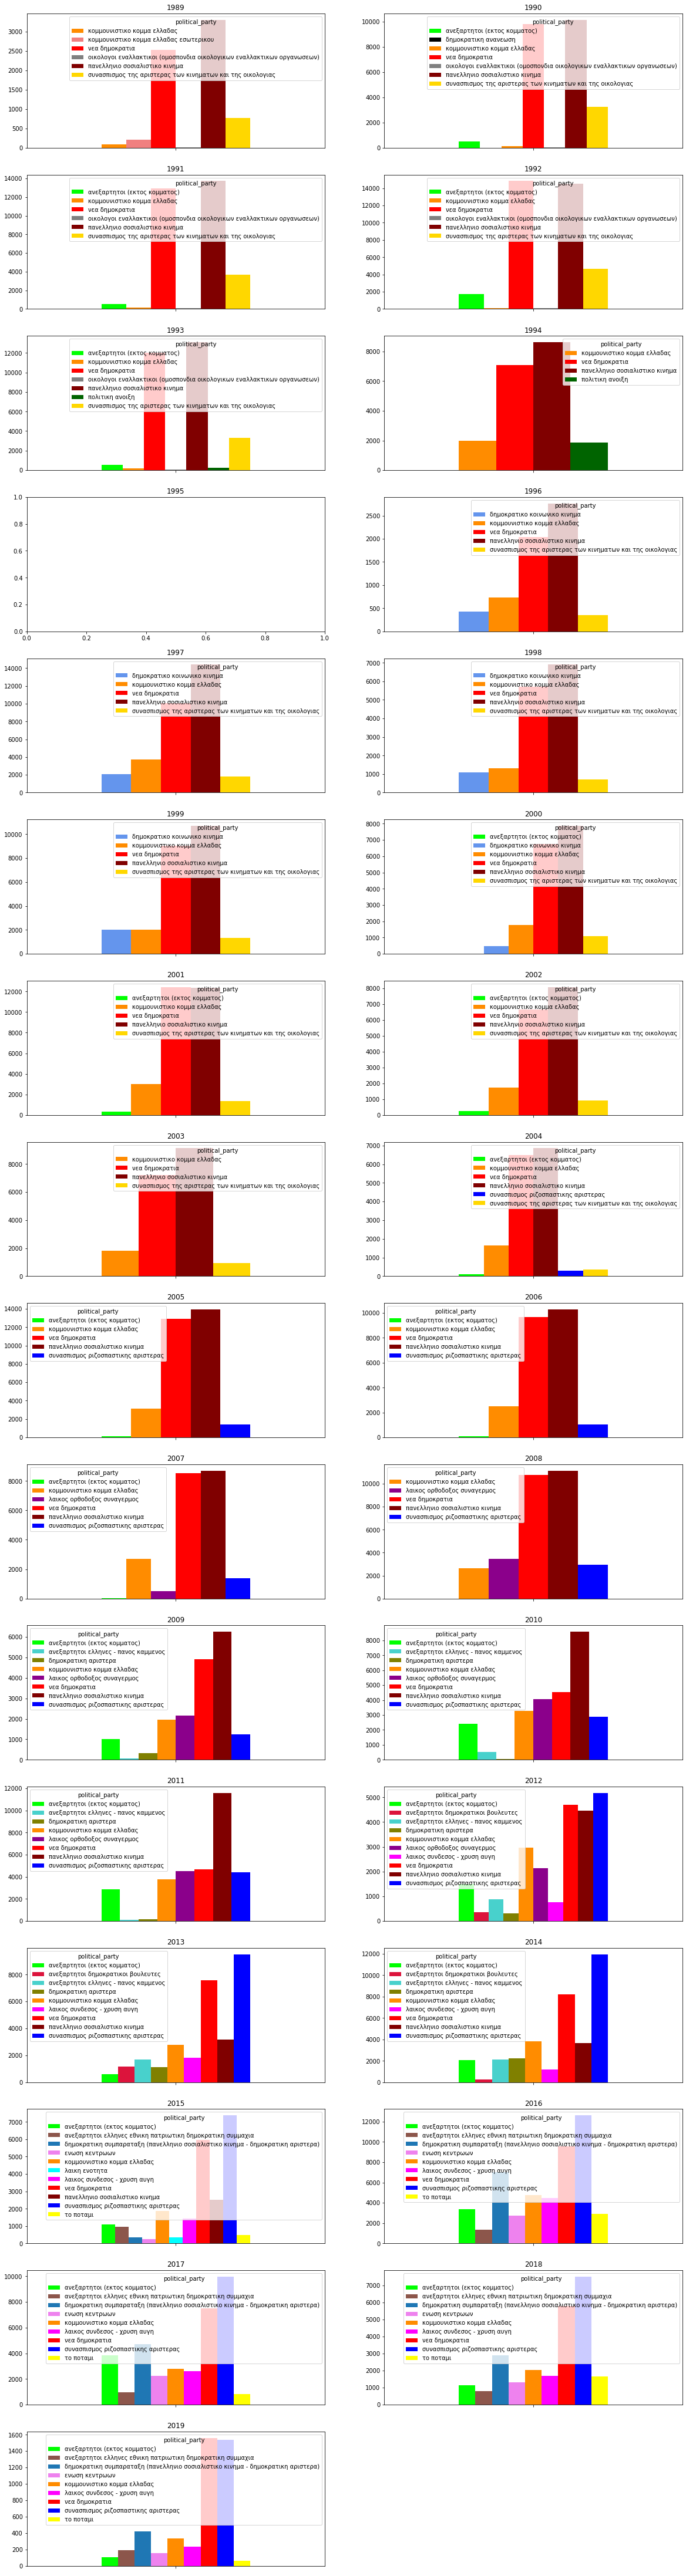

In [260]:
fig, ax = plt.subplots(16,2)

# 1st year we study
year = 1989

for row in range(16):
    for col in range(2):
        # check if we have data for the specific year
        if not year in speeches_partime['sitting_date'].tolist() : 
            ax[row,col].set_title(year)
            year += 1
            continue
        # isolate entries for the specific year
        sp_year = speeches_partime[speeches_partime['sitting_date']==year].reset_index()
        # remove vertical label
        sp_year.rename(columns={'Number_of_speeches': ' '}, inplace=True)
        pivot = sp_year.pivot_table(values=' ',columns=['political_party'])
        # show subplot
        diagram = pivot.plot(title=year,
                             kind='bar', 
                             figsize=(20, 80),
                             fontsize=10,
                             ax = ax[row,col],
                             xlabel=None, ylabel=None,
                             legend = True,
                             color = colors)
        year += 1
        
# we don't study 2020
ax[row,col].set_visible(False)

- From the above graphs, the following observations are made :
    - The last decade (2009-2019) the number of political parties participating in the Parliament through speech has increased, with the minimum of this number being 8. The previous years (1989-2008) the maximum number of political parties participating through speech was 7 in 1990 and in 1993.
    - Only 2 political parties are shown in all graphs, *νέα δημοκρατία (red)* and *κομμουνιστικό κόμμα Ελλάδας (darkorange)*, with the first one always having the 1st or the 2nd place regarding the number of speeches throughout the years.
    - It's interesting to see how *συνασπισμός ριζοσπαστικής αριστεράς* party started in 2004 having the last place regarding the number of speeches, and ended up being on the first place from 2015 onwards.
    - There are no data for 1995.

- Regarding the **speakers per party**, the following table shows the results. The order of the political parties is descending based on the number of speakers.

In [261]:
speakers_party = speeches[['political_party','member_name']].groupby("political_party").count().sort_values(by="member_name", ascending=False)

#rename column
speakers_party.rename(columns={'member_name':'Number of speakers'}, inplace=True)

speakers_party

,Number of speakers
political_party,
νεα δημοκρατια,232483
πανελληνιο σοσιαλιστικο κινημα,226657
συνασπισμος ριζοσπαστικης αριστερας,81278
κομμουνιστικο κομμα ελλαδας,61753
συνασπισμος της αριστερας των κινηματων και της οικολογιας,24428
ανεξαρτητοι (εκτος κομματος),24259
λαικος ορθοδοξος συναγερμος,16821
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα),15402
λαικος συνδεσος - χρυση αυγη,14172


- These results are also shown in the **graph** (pie chart) below.
- As the chart shows, over 60% of the speakers are part of only 2 of the 21 political parties throughout the years.

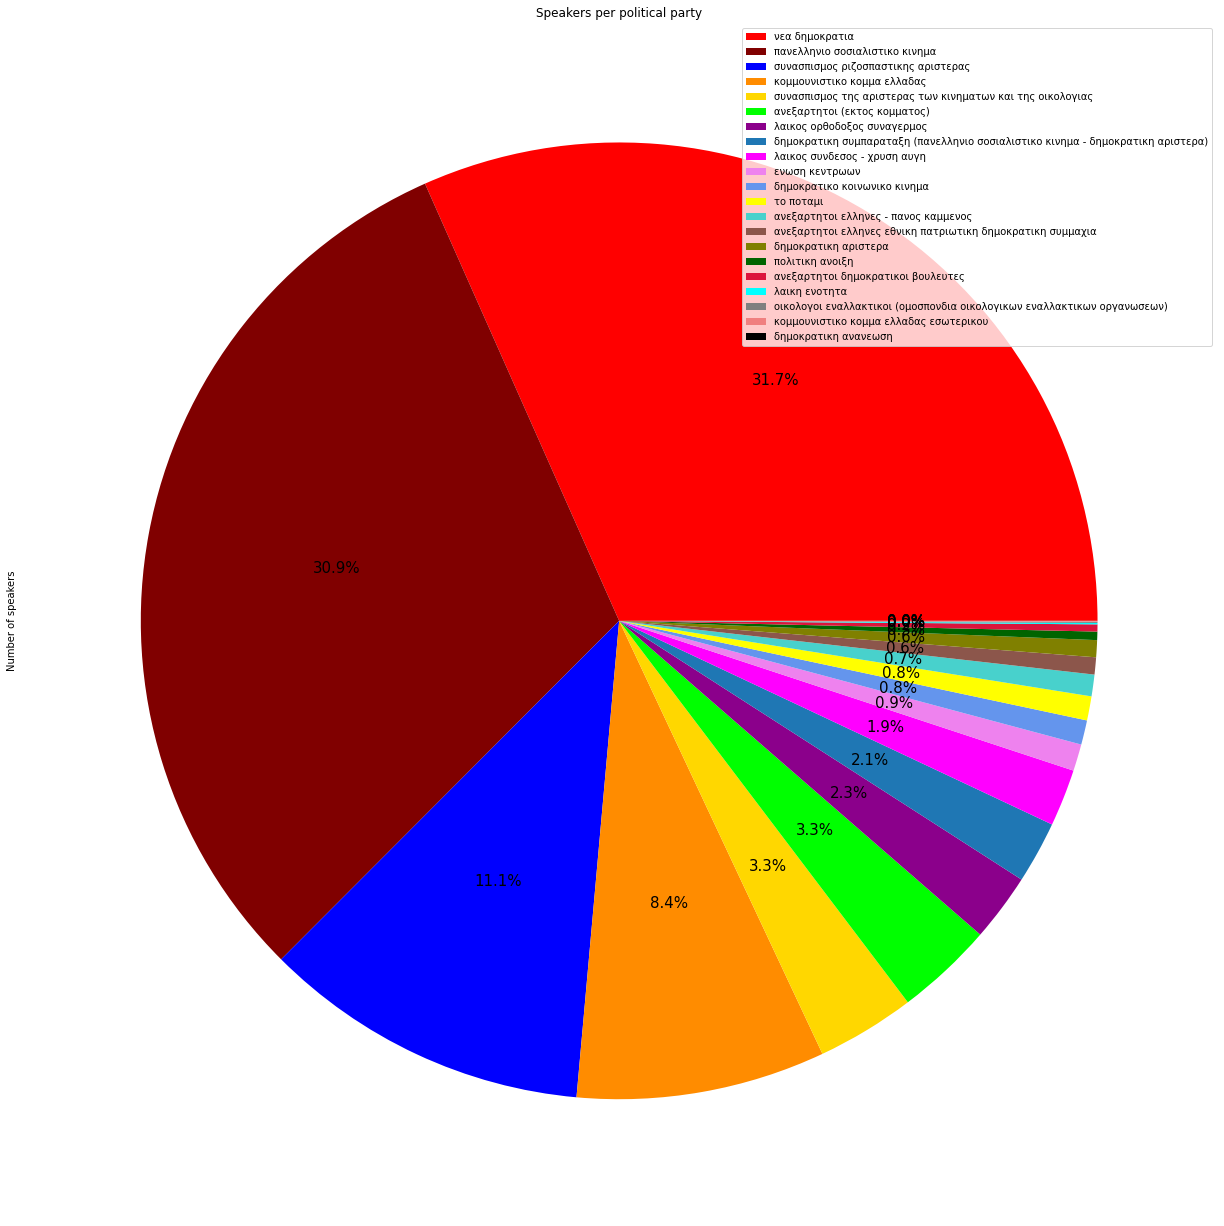

In [262]:
graph = speakers_party.plot(y = 'Number of speakers',
                            title="Speakers per political party",
                            kind='pie', 
                            labels= None,
                            autopct='%1.1f%%',
                            fontsize=15,
                            figsize=(25, 22),
                            colors=[colors[key] for key in list(speakers_party.index)])

- Regarding the speeches over time, the following table shows the results. The analysis is more efficient if it is done by year, as the dataset contains three decades.

In [263]:
# make a copy
speakers_time = speeches

# keep only years from dates
speakers_time.loc[:,'sitting_date'] = pd.DatetimeIndex(speakers_time['sitting_date']).strftime('%Y')

# convert years to integers
speakers_time = speakers_time.astype({'sitting_date':np.int16})

# get speakers over time
speakers_time = speakers_time[['sitting_date','member_name']].groupby("sitting_date").count().sort_values(by="sitting_date").reset_index()

#rename column
speakers_time.rename(columns={'member_name':'Number_of_speakers'}, inplace=True)

speakers_time

,sitting_date,Number_of_speakers
0,1989,6899
1,1990,23875
2,1991,31078
3,1992,35977
4,1993,29463
5,1994,19588
6,1996,6321
7,1997,32059
8,1998,15728
9,1999,25065


- These results are also shown in the **diagrams** below.

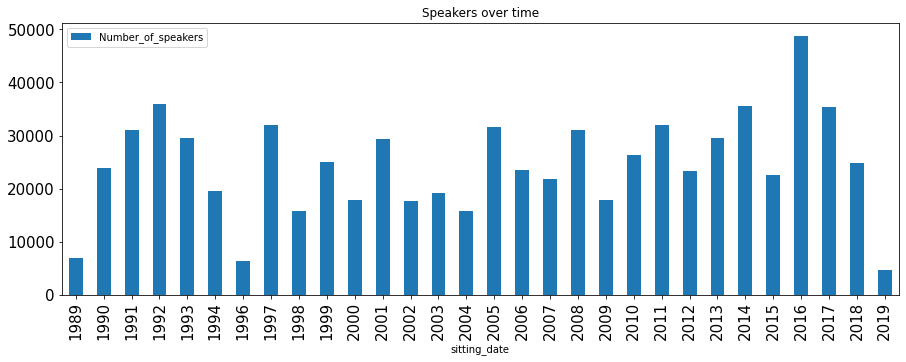

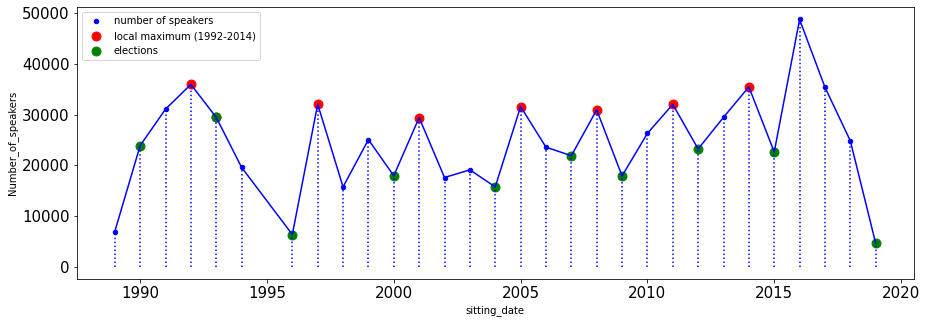

In [267]:
# first graph
graph = speakers_time.plot(x = 'sitting_date',
                           y = 'Number_of_speakers',
                           title="Speakers over time",
                           kind='bar', 
                           figsize=(15, 5),
                           fontsize=15)

# second graph
# blue dots (speakers per year)
graph_line = speakers_time.plot(x = 'sitting_date',
                                y = 'Number_of_speakers',
                                kind='scatter', 
                                color = 'blue',
                                marker ='o',
                                figsize=(15, 5),
                                label = 'number of speakers',
                                fontsize=15)
# vertical dotted lines
plt.vlines(x = speakers_time['sitting_date'], 
           ymin=0, ymax=speakers_time['Number_of_speakers'],
           linestyles='dotted',
           color='blue')

# red dots (local maximums)
graph_red = speakers_time[(speakers_time['sitting_date']>1991) & 
                          (speakers_time['sitting_date']<2015) & 
                          (speakers_time['sitting_date']!=2013) &
                          (speakers_time['Number_of_speakers']>=29419)]  \
                          .plot(x = 'sitting_date',
                                y = 'Number_of_speakers',
                                kind='scatter', 
                                color = 'red',
                                ax = graph_line,
                                s = 80,
                                label = 'local maximum (1992-2014)')
# green dots (elections)
graph_green = speakers_time[speakers_time['sitting_date'].isin(elections)]  \
                           .plot(x = 'sitting_date',
                                 y = 'Number_of_speakers',
                                 kind='scatter', 
                                 color = 'green',
                                 ax = graph_line,
                                 s = 80,
                                 label = 'elections')
# blue lines connecting the dots
graph_lines = plt.plot(speakers_time['sitting_date'],
                       speakers_time['Number_of_speakers'], 
                       color='blue')

- Just like in the analysis of speeches over time, looking at years 1992 to 2014 in the second graph, it seems as every 3-4 years there's an increase in the number of speakers, while in the years in-between there's at least one decrease (multiple forms of 'U'). The red dots represent the local maximums within a range of 6-8 years.
- Given that the Greek legislative elections (represented with green dots) were conducted in 1996, 2000, 2004, 2007, 2012, 2015, it is observed that one year after each election there's a local maximum, meaning that more members of the Parliament were willing to make a speech. The only exceptions in this observation are years 1992, 2011 and 2014, where local maximums are observed the year before the election.

- As regards the **speakers per party and time**, the following table shows the results. The analysis is more efficient if it is done by year regarding time, as the dataset contains three decades.

In [265]:
# make a copy
speakers_partime = speeches

# keep only years from dates
speakers_partime.loc[:,'sitting_date'] = pd.DatetimeIndex(speakers_partime['sitting_date']).strftime('%Y')

# convert years to integers
speakers_partime = speakers_partime.astype({'sitting_date':np.int16})

# get speakers over time
speakers_partime = speakers_partime[['sitting_date','political_party','member_name']].groupby(['sitting_date','political_party']).count().sort_values(by="sitting_date").reset_index()

#rename column
speakers_partime.rename(columns={'member_name':'Number_of_speakers'}, inplace=True)

speakers_partime

,sitting_date,political_party,Number_of_speakers
0,1989,κομμουνιστικο κομμα ελλαδας,93
1,1989,κομμουνιστικο κομμα ελλαδας εσωτερικου,202
2,1989,νεα δημοκρατια,2533
3,1989,οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων...,5
4,1989,πανελληνιο σοσιαλιστικο κινημα,3304
...,...,...,...
197,2019,δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστι...,421
198,2019,ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατ...,188
199,2019,ανεξαρτητοι (εκτος κομματος),102
200,2019,ενωση κεντρωων,157


- Since the number of rows is extremely high to make a representation that can be analyzed, multiple graphs will be created.
- Each graph will show the number of speakers per political party for a particular year. Having 3 decades of data (1989-2019), there will be 31 graphs.

- Years 1989 to 2019 are 31 years, so the figure which will contain the subplots(graphs) will be 16x2, meaning that all years will be displayed in pairs of 2.
- For each year, starting from 1989, its entries are isolated in dataframe sp_year, and after removing the vertical label Number_of_speakers of x-axis, a graph is created.
- Since 16x2=32, an extra subplot will be created, and it will the last one. Having the position of this subplot, it is set to invisible.
- The **speakers per party per year graphs** are shown below.

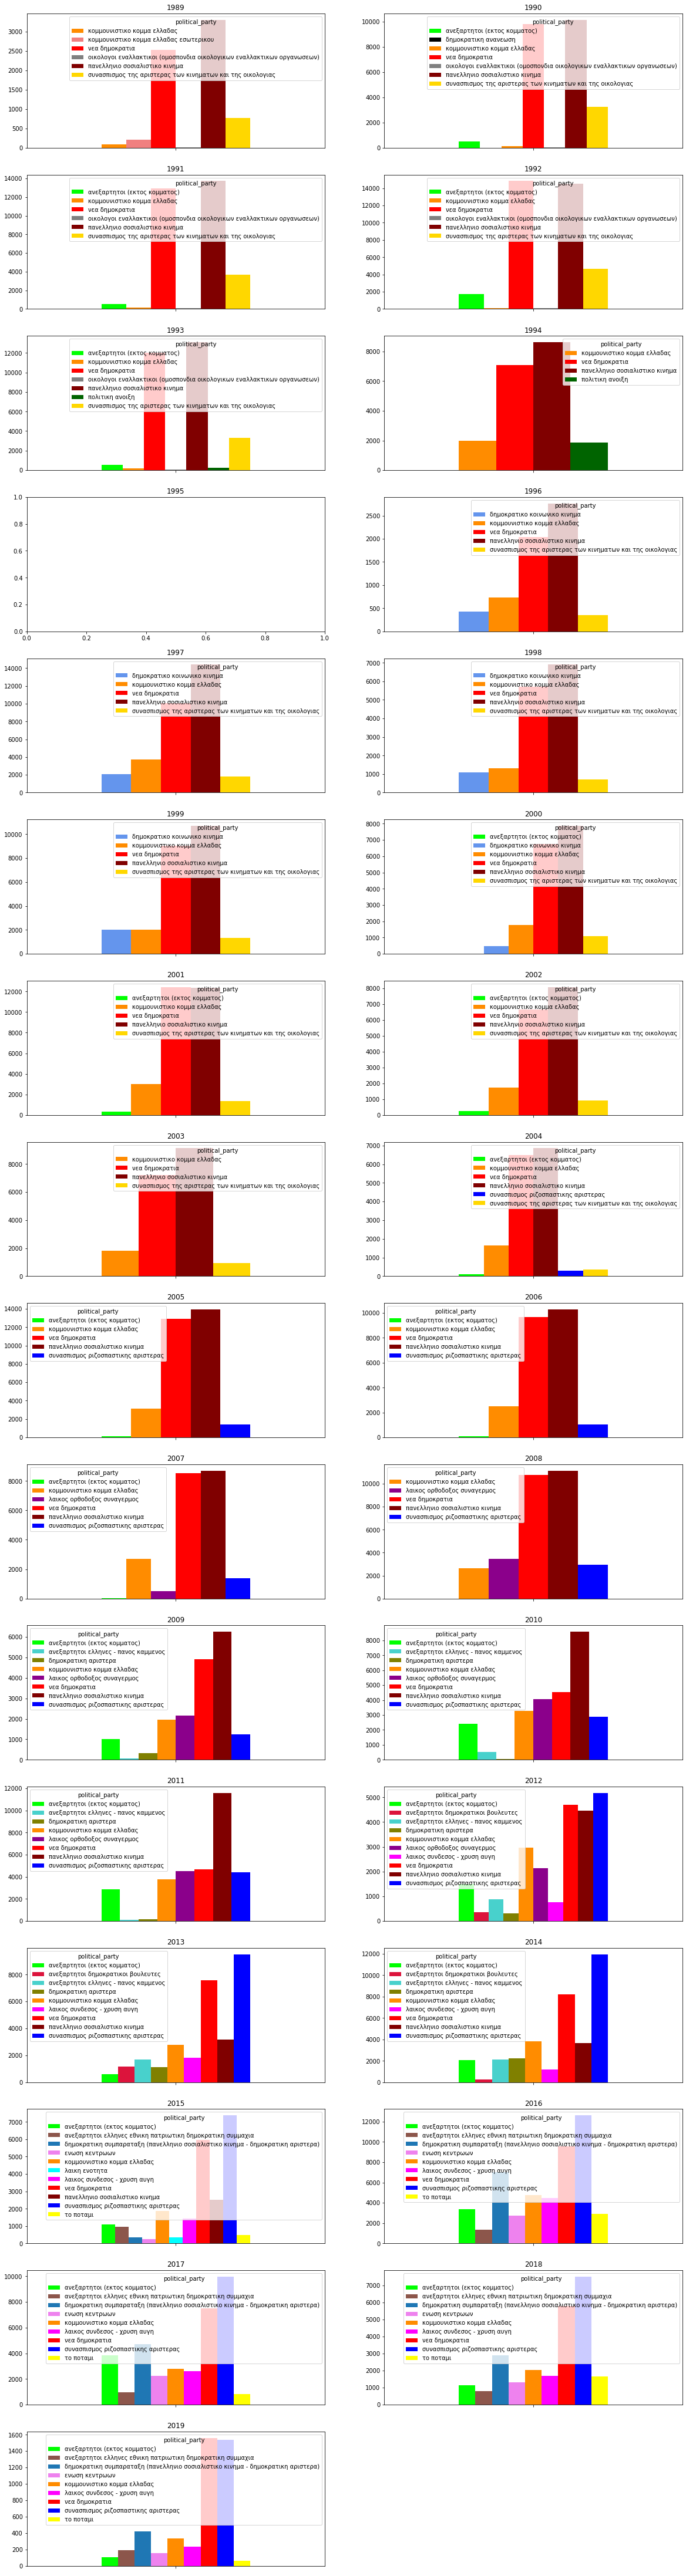

In [266]:
fig, ax = plt.subplots(16,2)

# 1st year we study
year = 1989

for row in range(16):
    for col in range(2):
        # check if we have data for the specific year
        if not year in speakers_partime['sitting_date'].tolist() : 
            ax[row,col].set_title(year)
            year += 1
            continue
        # isolate entries for the specific year
        sp_year = speakers_partime[speakers_partime['sitting_date']==year].reset_index()
        # remove vertical label
        sp_year.rename(columns={'Number_of_speakers': ' '}, inplace=True)
        pivot = sp_year.pivot_table(values=' ',columns=['political_party'])
        # show subplot
        diagram = pivot.plot(title=year,
                             kind='bar', 
                             figsize=(20, 80),
                             fontsize=10,
                             ax = ax[row,col],
                             xlabel=None, ylabel=None,
                             legend = True,
                             color = colors)
        year += 1
        
# we don't study 2020
ax[row,col].set_visible(False)

- From the above graphs, the observations made are identical to the ones made for speeches per party over time. This was expected, as it makes sense to have more speakers if we have more speeches, these numbers have proportional relationship.

## Classification without Neural Networks

- Data are separated in train and test data using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function with the following way :
    - train: 70%
    - test : 30%  
- The function was imported in the beginning of this assignment.
  
*_`X` and `Y` were initialized in Part 1 (Data Selection - Preparation). `X` holds all speeches and `Y` holds the political parties_

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print('train data :',len(X_train))
print('test data :',len(X_test))

train data : 424136
test data : 181773


- For the classification of the speeches with target variable the political parties, three classifiers will be used:
    - Naive Bayes Classifier
    - SGD Classifier
    - Linear SVC
- For each classifier the following steps will be made :
    1. pipeline creation (using TF-IDF as vectorizer)
    2. data training
    3. test data prediction
    4. report (including accuracy and other metrics)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

- The following steps are for the **Naive Bayes Classifier**.
- As the printed report shows, 
$$accuracy = 0.43$$

In [36]:
from sklearn.naive_bayes import MultinomialNB

# create pipeline
bayes = Pipeline([('vect', TfidfVectorizer()),
                  ('clf', MultinomialNB()),])
# train data
bayes.fit(X_train,Y_train)

# Predict with X_test
predicted = bayes.predict(X_test)

# Model Accuracy (report)
print(metrics.classification_report(Y_test, predicted,
                                    target_names=Y_test.unique().tolist(), zero_division=False))

                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.00      0.00      0.00      4949
                                                 πανελληνιο σοσιαλιστικο κινημα       0.00      0.00      0.00       448
                                                    κομμουνιστικο κομμα ελλαδας       0.00      0.00      0.00      1098
                                            συνασπισμος ριζοσπαστικης αριστερας       0.00      0.00      0.00       719
                                                                      το ποταμι       0.00      0.00      0.00         2
                                                                 νεα δημοκρατια       0.00      0.00      0.00       957
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.00      0.00      0.00      2906
                               

- The following steps are for the **SDG Classifier**.
- As the printed report shows, 
$$accuracy = 0.48$$

In [37]:
from sklearn.linear_model import SGDClassifier

# create pipeline
sgd = Pipeline([('vect', TfidfVectorizer()),
                ('clf', SGDClassifier()),])
# train data
sgd.fit(X_train,Y_train)

# Predict with X_test
predicted = sgd.predict(X_test)

# Model Accuracy (report)
print(metrics.classification_report(Y_test, predicted,
                                    target_names=Y_test.unique().tolist(), zero_division=False))

                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.09      0.02      0.03      4949
                                                 πανελληνιο σοσιαλιστικο κινημα       0.03      0.02      0.02       448
                                                    κομμουνιστικο κομμα ελλαδας       0.20      0.07      0.10      1098
                                            συνασπισμος ριζοσπαστικης αριστερας       0.25      0.07      0.11       719
                                                                      το ποταμι       0.00      0.00      0.00         2
                                                                 νεα δημοκρατια       0.29      0.08      0.13       957
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.25      0.08      0.13      2906
                               

- The following steps are for the **Linear SVC Classifier**.
- As the printed report shows, 
$$accuracy = 0.50$$

In [38]:
from sklearn.svm import LinearSVC

# create pipeline
lsvc = Pipeline([('vect', TfidfVectorizer()),
                 ('clf', LinearSVC()),])
# train data
lsvc.fit(X_train,Y_train)

# Predict with X_test
predicted = lsvc.predict(X_test)

# Model Accuracy (report)
print(metrics.classification_report(Y_test, predicted,
                                    target_names=Y_test.unique().tolist(), zero_division=False))

                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.27      0.04      0.06      4949
                                                 πανελληνιο σοσιαλιστικο κινημα       0.48      0.03      0.06       448
                                                    κομμουνιστικο κομμα ελλαδας       0.61      0.10      0.18      1098
                                            συνασπισμος ριζοσπαστικης αριστερας       0.69      0.14      0.23       719
                                                                      το ποταμι       0.00      0.00      0.00         2
                                                                 νεα δημοκρατια       0.72      0.14      0.24       957
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.56      0.14      0.23      2906
                               

- To find the best classifier of the above, **cross validation** has to be done, to verify that the accuracy of each report doesn't depend on the input data. For this process, function [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) is used, with input data to be all the speeches available.

In [ ]:
from sklearn.model_selection import cross_val_score

# Naive Bayes Classifier
bayes_a = Pipeline([('vect', TfidfVectorizer()),
                    ('clf', MultinomialNB()),])
bayes_accuracies = cross_val_score(estimator=bayes, X=X, y=Y, scoring='accuracy')

# SDG Classifier
sgd_a = Pipeline([('vect', TfidfVectorizer()),
                  ('clf', SGDClassifier()),])
sgd_accuracies = cross_val_score(estimator=sgd, X=X, y=Y, scoring='accuracy')

# Linear SVC Classifier
lsvc_a = Pipeline([('vect', TfidfVectorizer()),
                   ('clf', LinearSVC()),])
lsvc_accuracies = cross_val_score(estimator=lsvc, X=X, y=Y, scoring='accuracy')

- Finding the average accuracy and the degree of variance of each classifier, the best classifier is found.
- The degree of variance is a percent showing the dependence of the accuracy to the input data. This means that the smaller this percent is, the less dependent the accuracy is to the input results. 

In [79]:
print('Naive Bayes \nAverage accuracy : ',bayes_accuracies.mean(),'\nDegree of variance : ',bayes_accuracies.std()*100,'%')
print('\nSGD \nAverage accuracy : ',sgd_accuracies.mean(),'\nDegree of variance : ',sgd_accuracies.std()*100,'%')
print('\nLinear SVC \nAverage accuracy : ',lsvc_accuracies.mean(),'\nDegree of variance : ',lsvc_accuracies.std()*100,'%')

Naive Bayes 
Average accuracy :  0.35599734022000784 
Degree of variance :  1.6790237417070406 %

SGD 
Average accuracy :  0.37957176524159575 
Degree of variance :  3.0834804934129156 %

Linear SVC 
Average accuracy :  0.4002514062020057 
Degree of variance :  4.038241605575163 %


- According to the results above, the best classifier is **Linear SVC**. The degree of variance is the biggest of them all, but it is still small enough to tell that the input data used do not affect the accuracy, that the accuracy is almost independent. 
- To find the best hyperparameters for this classifier, [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is used.

In [30]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range Linear SCV
param_grid = {'clf__C': (1,0.1,0.01,0.001)}  

# the pipeline tested
lsvc = Pipeline([('vect', TfidfVectorizer()),
                 ('clf', LinearSVC()),])

# grid search
grid = GridSearchCV(lsvc, param_grid, refit = True, verbose = 3, cv=3) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .......................................clf__C=1; total time= 4.7min
[CV 2/3] END .......................................clf__C=1; total time= 5.0min
[CV 3/3] END .......................................clf__C=1; total time= 5.7min
[CV 1/3] END .....................................clf__C=0.1; total time= 3.8min
[CV 2/3] END .....................................clf__C=0.1; total time= 3.7min
[CV 3/3] END .....................................clf__C=0.1; total time= 3.1min
[CV 1/3] END ....................................clf__C=0.01; total time= 3.2min
[CV 2/3] END ....................................clf__C=0.01; total time= 5.3min
[CV 3/3] END ....................................clf__C=0.01; total time= 5.5min
[CV 1/3] END ...................................clf__C=0.001; total time= 5.4min
[CV 2/3] END ...................................clf__C=0.001; total time=10.5min
[CV 3/3] END ...................................c

- The report from the prediction on X_test data is shown below. 
- The two reports before and after the tuning of the hyperparameters (grid search) are identical, which means that the original selections of hyperparameters were the best.

In [35]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(metrics.classification_report(Y_test, grid_predictions,
                                    target_names=Y_test.unique().tolist(), zero_division=False))

                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.44      0.00      0.01      4949
                                                 πανελληνιο σοσιαλιστικο κινημα       1.00      0.01      0.02       448
                                                    κομμουνιστικο κομμα ελλαδας       0.63      0.04      0.07      1098
                                            συνασπισμος ριζοσπαστικης αριστερας       0.72      0.03      0.05       719
                                                                      το ποταμι       0.00      0.00      0.00         2
                                                                 νεα δημοκρατια       0.68      0.04      0.08       957
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.73      0.07      0.12      2906
                               

- To gauge the efficacy of the optimized LinearSVC, a [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) is also trained. 
- From the report shown below, DummyClassifier's accuracy is 0.34, which is lower than the LinearSVC's accuracy by 0.16. 

In [39]:
from sklearn.dummy import DummyClassifier

# create pipeline
dummy = Pipeline([('vect', TfidfVectorizer()),
                 ('clf', DummyClassifier()),])
# train data
dummy.fit(X_train,Y_train)

# Predict with X_test
predicted = dummy.predict(X_test)

# Model Accuracy (report)
print(metrics.classification_report(Y_test, predicted,
                                    target_names=Y_test.unique().tolist(), zero_division=False))

                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.00      0.00      0.00      4949
                                                 πανελληνιο σοσιαλιστικο κινημα       0.00      0.00      0.00       448
                                                    κομμουνιστικο κομμα ελλαδας       0.00      0.00      0.00      1098
                                            συνασπισμος ριζοσπαστικης αριστερας       0.00      0.00      0.00       719
                                                                      το ποταμι       0.00      0.00      0.00         2
                                                                 νεα δημοκρατια       0.00      0.00      0.00       957
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.00      0.00      0.00      2906
                               

## Classification with a Neural Network

- Libraries used for the convertion of the data to valid form for the neural network and for the neural network are imported below.

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

- [Tokenizer]() tokenizes all speeches used as train data (`X_train`) and keeps the 5000 most common ones. In case a speech contains a word that doesn't belong to the 5000, a special character `<OOV>` is inserted in the place of that word.
- As the dictionary printed shows below, the most common word is *\<OOV\>* , then *κύριε* etc.

In [141]:
tokenizer = Tokenizer(num_words = 5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'κύριε': 2,
 'κ': 3,
 'ή': 4,
 'υπάρχει': 5,
 'πρόεδρε': 6,
 'σήμερα': 7,
 'κυβέρνηση': 8,
 'συνάδελφοι': 9,
 'θέμα': 10}

- All train data are turned into lists of sequences.

In [142]:
# turn tokens into lists of sequence
X_train_seq = tokenizer.texts_to_sequences(X_train)
print(X_train_seq[10])

[1, 41, 26, 1672, 786]


- All train data are padded so that they have the same length (200). 
- If a sequence's size is smaller than 200, zeros are inserted at the end of the sequence.
- If a sequence's size is bigger than 200, elements are truncated from the end of the sequence.

In [237]:
X_train_padded = pad_sequences(X_train_seq, maxlen=200, padding='post', truncating='post')

print(len(X_train_seq[0]))
print(len(X_train_padded[0]))

print(len(X_train_seq[91331]))
print(len(X_train_padded[91331]))

25
200
12633
200


- The same process goes for the test data.

In [238]:
tokenizer = Tokenizer(num_words = 5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_test)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_seq, maxlen=200, padding='post', truncating='post')

print(len(X_test_seq))
print(X_test_padded.shape)

181773
(181773, 200)


- Target Value (political parties) are expected to be numpy arrays, so they are converted using [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) function.

In [145]:
Y_train_seq = pd.get_dummies(Y_train).values
Y_test_seq = pd.get_dummies(Y_test).values

- The model of the LSTM neural network follows. 

In [148]:
dimensions = 32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding((X_train_padded.max()+1).astype('int64'), output_dim = dimensions),
    tf.keras.layers.LSTM(dimensions),
    tf.keras.layers.Dense(dimensions, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          160000    
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_21 (Dense)             (None, 21)                693       
Total params: 170,069
Trainable params: 170,069
Non-trainable params: 0
_________________________________________________________________


- The model is compiled and then trained in 8 epochs using 20% of the train data as validation data.

In [149]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

num_epochs = 8

history = model.fit(X_train_padded, 
                    Y_train_seq, 
                    epochs=num_epochs, 
                    validation_split=0.2)

Epoch 1/8
10604/10604 [==============================] - 1358s 128ms/step - loss: 1.7930 - accuracy: 0.3413 - val_loss: 1.7282 - val_accuracy: 0.3551
Epoch 2/8
10604/10604 [==============================] - 1429s 135ms/step - loss: 1.7023 - accuracy: 0.3511 - val_loss: 1.6416 - val_accuracy: 0.3679
Epoch 3/8
10604/10604 [==============================] - 1529s 144ms/step - loss: 1.6140 - accuracy: 0.3847 - val_loss: 1.5482 - val_accuracy: 0.4265
Epoch 4/8
10604/10604 [==============================] - 1534s 145ms/step - loss: 1.5261 - accuracy: 0.4391 - val_loss: 1.5162 - val_accuracy: 0.4406
Epoch 5/8
10604/10604 [==============================] - 1484s 140ms/step - loss: 1.4738 - accuracy: 0.4609 - val_loss: 1.4950 - val_accuracy: 0.4512
Epoch 6/8
10604/10604 [==============================] - 1548s 146ms/step - loss: 1.4436 - accuracy: 0.4736 - val_loss: 1.4881 - val_accuracy: 0.4560
Epoch 7/8
10604/10604 [==============================] - 1540s 145ms/step - loss: 1.4166 - accuracy:

- Looking the relations between `accuracy`-`val_accuracy` and `loss`-`val_loss` of each epoch from 5th epoch and beyond, overfitting is suspected. 
- Time to evaluate the model using the test data.

In [164]:
loss, accuracy = model.evaluate(X_test_padded, Y_test_seq)

print('Accuracy: ',accuracy,'\nLoss: ',loss)

5681/5681 [==============================] - 183s 32ms/step - loss: 2.0915 - accuracy: 0.3312
Accuracy:  0.331160306930542 
Loss:  2.0914695262908936


- According to the graphs below, overfitting appears around epochs No3 and No5. Specifically, there's a steep change in the slope of both validation variables, suggesting that the train set improves thoughtout the epochs, while validation set improves up to epoch No3 and then decreases throughtout the rest of the epochs. This steep change occurs in epoch No3 and escalates in epoch No5, where val_loss is higher than train_loss and val_accuracy is lower than train_accuracy.

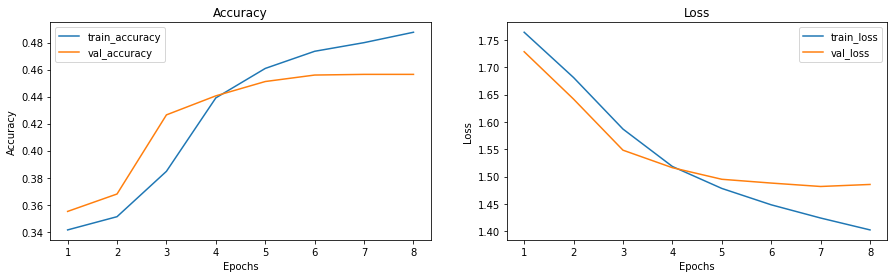

In [252]:
fig, axs = plt.subplots(1,2, figsize=(15,4))

values = history.history

# Accuracy Graph
axs[0].plot(np.arange(1,num_epochs+1),values['accuracy'])
axs[0].plot(np.arange(1,num_epochs+1),values['val_accuracy'])
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel('Accuracy')
axs[0].legend(['train_accuracy', 'val_accuracy'])
axs[0].set_title('Accuracy')

# Loss Graph
axs[1].plot(np.arange(1,num_epochs+1),values['loss'])
axs[1].plot(np.arange(1,num_epochs+1),values['val_loss'])
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel('Loss')
axs[1].legend(['train_loss', 'val_loss'])
axs[1].set_title('Loss')

plt.show()